Assignment_5 

Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare

In [1]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem


In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import our data into pandas from CSV
path = 'data/Pymaceuticals_data_clinicaltrial_data.csv'
clinical_trial_data_df = pd.read_csv(path, low_memory=False)

clinical_trial_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
path = 'data/Pymaceuticals_data_mouse_drug_data.csv'
mouse_drug_data_df = pd.read_csv(path, low_memory=False)

mouse_drug_data_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
# Merge the two data sets along Mouse ID
clinical_trial_complete = pd.merge(
    clinical_trial_data_df, mouse_drug_data_df, how="left", on=["Mouse ID"])
clinical_trial_complete.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril
5,h246,0,45.0,0,Ketapril
6,p189,0,45.0,0,Ketapril
7,n923,0,45.0,0,Ketapril
8,q119,0,45.0,0,Ketapril
9,f993,0,45.0,0,Naftisol


 Tumor Response to Treatment
    
 Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

 Convert to DataFrame

 Preview DataFrame

In [6]:
treatment_response = clinical_trial_complete[["Drug", "Timepoint", "Tumor Volume (mm3)"]]
treatment_response

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Ketapril,0,45.000000
2,Ketapril,0,45.000000
3,Ketapril,0,45.000000
4,Ketapril,0,45.000000
...,...,...,...
1901,Capomulin,45,41.581521
1902,Capomulin,45,31.023923
1903,Ceftamin,45,61.433892
1904,Placebo,45,58.634971


In [7]:
timepoint_bin = treatment_response["Timepoint"].unique()
timepoint_bin = list(timepoint_bin)
timepoint_bin

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

In [8]:
drug_bin = treatment_response["Drug"].unique()
drug_bin = list(drug_bin)
drug_bin.sort()
drug_bin

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [9]:
drug_column = []
timepoint_column = []
drug_bin_index = 0


In [10]:
for i in timepoint_bin:
    for i in drug_bin:
        drug_column.append(drug_bin[drug_bin_index])
    drug_bin_index += 1



In [11]:
#
print(drug_column)

['Capomulin', 'Capomulin', 'Capomulin', 'Capomulin', 'Capomulin', 'Capomulin', 'Capomulin', 'Capomulin', 'Capomulin', 'Capomulin', 'Ceftamin', 'Ceftamin', 'Ceftamin', 'Ceftamin', 'Ceftamin', 'Ceftamin', 'Ceftamin', 'Ceftamin', 'Ceftamin', 'Ceftamin', 'Infubinol', 'Infubinol', 'Infubinol', 'Infubinol', 'Infubinol', 'Infubinol', 'Infubinol', 'Infubinol', 'Infubinol', 'Infubinol', 'Ketapril', 'Ketapril', 'Ketapril', 'Ketapril', 'Ketapril', 'Ketapril', 'Ketapril', 'Ketapril', 'Ketapril', 'Ketapril', 'Naftisol', 'Naftisol', 'Naftisol', 'Naftisol', 'Naftisol', 'Naftisol', 'Naftisol', 'Naftisol', 'Naftisol', 'Naftisol', 'Placebo', 'Placebo', 'Placebo', 'Placebo', 'Placebo', 'Placebo', 'Placebo', 'Placebo', 'Placebo', 'Placebo', 'Propriva', 'Propriva', 'Propriva', 'Propriva', 'Propriva', 'Propriva', 'Propriva', 'Propriva', 'Propriva', 'Propriva', 'Ramicane', 'Ramicane', 'Ramicane', 'Ramicane', 'Ramicane', 'Ramicane', 'Ramicane', 'Ramicane', 'Ramicane', 'Ramicane', 'Stelasyn', 'Stelasyn', 'Stel

In [12]:
for i in drug_bin:
    timepoint_bin_index = 0
    for i in timepoint_bin:
        timepoint_column.append(timepoint_bin[timepoint_bin_index])
        timepoint_bin_index += 1



In [13]:
#
print(timepoint_column)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45]


In [14]:
treatment_response_pd = pd.DataFrame(list(zip(drug_column, timepoint_column)), columns = ["Drug", "Timepoint"])
treatment_response_pd

,Drug,Timepoint
0,Capomulin,0
1,Capomulin,5
2,Capomulin,10
3,Capomulin,15
4,Capomulin,20
...,...,...
95,Zoniferol,25
96,Zoniferol,30
97,Zoniferol,35
98,Zoniferol,40


In [15]:
treatment_response_pd["Tumor Volume (mm3)"] = ""
treatment_response_pd1 = treatment_response_pd
treatment_response_pd

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,
1,Capomulin,5,
2,Capomulin,10,
3,Capomulin,15,
4,Capomulin,20,
...,...,...,...
95,Zoniferol,25,
96,Zoniferol,30,
97,Zoniferol,35,
98,Zoniferol,40,


In [16]:
a_df = treatment_response.loc[((treatment_response["Drug"] == "Capomulin") & (treatment_response["Timepoint"] == 0)), :]
a_df["Tumor Volume (mm3)"].mean()

45.0

In [17]:
drug_effect_average = []

In [18]:
for index, row in treatment_response_pd.iterrows():
    a_df = treatment_response.loc[((treatment_response["Drug"] == drug_column[index]) & (treatment_response["Timepoint"] == timepoint_column[index])), :]
    
    drug_effect_average.append(a_df["Tumor Volume (mm3)"].mean())

In [19]:
#
print(drug_effect_average)

[45.0, 44.2660864152, 43.084290581999994, 42.064317346250014, 40.716325321739134, 39.93952782681817, 38.76933928863637, 37.816838882272734, 36.958000811428576, 36.236113800000005, 45.0, 46.50305095857142, 48.285125216, 50.09405489368421, 52.15704850444446, 54.28767405777778, 56.76951721, 58.827547826428564, 61.46789544714287, 64.13242133615384, 45.0, 47.062001032800005, 49.40390857095239, 51.29639655619047, 53.197690935000004, 55.71525236222222, 58.299397209411765, 60.742461225833324, 63.162824422999996, 65.75556227777777, 45.0, 47.38917452086955, 49.582268975000005, 52.399973742631566, 54.920934738421046, 57.67898171789474, 60.994507193888886, 63.37168604647057, 66.06858034866666, 70.66295760818181, 45.0, 46.7960980973913, 48.694209604761916, 50.93301827619048, 53.644087443500005, 56.731967581666666, 59.559508558, 62.685086947333325, 65.60075373599999, 69.26550621153847, 45.0, 47.12558918833333, 49.423329478333336, 51.35974169800001, 54.36441702684211, 57.48257374470587, 59.8090631860

In [20]:
treatment_response_pd = pd.DataFrame(list(zip(drug_column, timepoint_column, drug_effect_average)), columns = ["Drug", "Timepoint", "Tumor Volume (mm3)"])
treatment_response_pd.head(25)

treatment_response_pd1 = treatment_response_pd

Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

Convert to DataFrame

Preview DataFrame

In [21]:
samples = []

In [22]:
for index, row in treatment_response_pd.iterrows():
    a_df = treatment_response.loc[((treatment_response["Drug"] == drug_column[index]) & (treatment_response["Timepoint"] == timepoint_column[index])), :]
    
    samples.append(a_df["Tumor Volume (mm3)"])

In [23]:
print(samples)

[0      45.0
228    45.0
229    45.0
230    45.0
231    45.0
232    45.0
233    45.0
234    45.0
235    45.0
236    45.0
237    45.0
238    45.0
239    45.0
240    45.0
241    45.0
242    45.0
243    45.0
244    45.0
245    45.0
246    45.0
247    45.0
248    45.0
249    45.0
250    45.0
251    45.0
Name: Tumor Volume (mm3), dtype: float64, 255    45.851193
258    45.462243
290    39.202129
302    43.180977
311    45.893720
314    41.408591
326    45.760886
329    41.534097
342    45.704434
343    38.796474
352    45.473753
357    45.838998
369    42.261665
391    41.019913
414    44.022752
425    45.597064
436    45.737145
437    45.781746
451    43.878496
452    45.595685
455    45.641438
464    45.895647
476    45.651331
478    45.839400
491    45.622381
Name: Tumor Volume (mm3), dtype: float64, 502    39.005494
517    46.568417
524    39.848223
527    46.304003
538    43.688026
543    46.759074
551    43.421014
557    46.414518
574    46.425366
578    42.992077
590    44.502042
603

In [24]:
sem = [s.sem() for s in samples]


In [25]:
standard_error_pd = pd.DataFrame(list(zip(drug_column, timepoint_column, sem)), columns = ["Drug", "Timepoint", "Tumor Volume (mm3)"])
standard_error_pd.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


Minor Data Munging to Re-Format the Data Frames

Preview that Reformatting worked

In [26]:
['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [27]:
Capomulin_effect_average = []
Ceftamin_effect_average = []
Infubinol_effect_average = []
Ketapril_effect_average = []
Naftisol_effect_average = []
Placebo_effect_average = []
Propriva_effect_average = []
Ramicane_effect_average = []
Stelasyn_effect_average = []
Zoniferol_effect_average = []

In [28]:
hundred_list = list(range(100))

In [29]:
for i in hundred_list:
    if (i < 10):
        Capomulin_effect_average.append(drug_effect_average[i])
    elif (i > 9) & (i < 20):
        Ceftamin_effect_average.append(drug_effect_average[i])
    elif (i > 19) & (i < 30):
        Infubinol_effect_average.append(drug_effect_average[i])
    elif (i > 29) & (i < 40):
        Ketapril_effect_average.append(drug_effect_average[i])
    elif (i > 39) & (i < 50):
        Naftisol_effect_average.append(drug_effect_average[i])
    elif (i > 49) & (i < 60):
        Placebo_effect_average.append(drug_effect_average[i])
    elif (i > 59) & (i < 70):
        Propriva_effect_average.append(drug_effect_average[i])
    elif (i > 69) & (i < 80):
        Ramicane_effect_average.append(drug_effect_average[i])
    elif (i > 79) & (i < 90):
        Stelasyn_effect_average.append(drug_effect_average[i])
    elif (i > 89) & (i < 100):
        Zoniferol_effect_average.append(drug_effect_average[i])

In [30]:
print(Ceftamin_effect_average)

[45.0, 46.50305095857142, 48.285125216, 50.09405489368421, 52.15704850444446, 54.28767405777778, 56.76951721, 58.827547826428564, 61.46789544714287, 64.13242133615384]


In [31]:
treatment_response_pd = pd.DataFrame(list(zip(timepoint_bin, Capomulin_effect_average, Ceftamin_effect_average, Infubinol_effect_average, Ketapril_effect_average, Naftisol_effect_average, Placebo_effect_average, Propriva_effect_average, Ramicane_effect_average, Stelasyn_effect_average, Zoniferol_effect_average)), columns = ['Timepoint', 'Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'])


In [32]:
treatment_response_pd = treatment_response_pd.set_index("Timepoint")
treatment_response_pd

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [33]:
print(timepoint_bin)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]


In [34]:
# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(40, 75, 1)
y_axis = np.arange(-5, 50, 5)


# Create a random array of data that we will use for our y values
y = timepoint_bin
data0 = np.array(Capomulin_effect_average)
data1 = np.array(Ceftamin_effect_average)
data2 = np.array(Infubinol_effect_average)
data3 = np.array(Ketapril_effect_average)
data4 = np.array(Naftisol_effect_average)
data5 = np.array(Placebo_effect_average)
data6 = np.array(Propriva_effect_average)
data7 = np.array(Ramicane_effect_average)
data8 = np.array(Stelasyn_effect_average)
data9 = np.array(Zoniferol_effect_average)

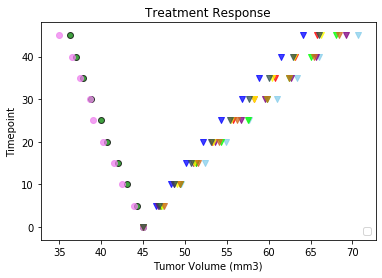

In [35]:
# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
Capomulin = plt.scatter(data0, y, marker="o", facecolors="green", edgecolors="black", alpha=0.75)
Ceftamin = plt.scatter(data1, y, marker="v", facecolors="blue", alpha=0.75)
Infubinol = plt.scatter(data2, y, marker="v", facecolors="red", alpha=0.75)
Ketapril = plt.scatter(data3, y, marker="v", facecolors="skyblue", alpha=0.75)
Naftisol = plt.scatter(data4, y, marker="v", facecolors="purple", alpha=0.75)
Placebo = plt.scatter(data5, y, marker="v", facecolors="lime", alpha=0.75)
Propriva = plt.scatter(data6, y, marker="v", facecolors="yellow", alpha=0.75)
Ramicane = plt.scatter(data7, y, marker="o", facecolors="violet", alpha=0.75)
Stelasyn = plt.scatter(data8, y, marker="v", facecolors="chocolate", alpha=0.75)
Zoniferol = plt.scatter(data9, y, marker="v", facecolors="darkslategrey", alpha=0.75)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Timepoint')
plt.title('Treatment Response')
plt.legend(handles=[Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Placebo, Propriva, Ramicane, Stelasyn, Zoniferol], loc="lower right")
plt.show()

Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.

In [36]:
clinical_trial_complete_sorted = clinical_trial_complete.sort_values(['Drug','Timepoint'])
clinical_trial_complete_sorted.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
228,j246,0,45.0,0,Capomulin
229,r554,0,45.0,0,Capomulin
230,s185,0,45.0,0,Capomulin
231,b742,0,45.0,0,Capomulin
232,x401,0,45.0,0,Capomulin
233,l509,0,45.0,0,Capomulin
234,s710,0,45.0,0,Capomulin
235,r157,0,45.0,0,Capomulin
236,u364,0,45.0,0,Capomulin


In [37]:
metastatic_sites_changes = clinical_trial_complete_sorted[["Drug", "Timepoint", "Metastatic Sites"]]
metastatic_sites_changes.head(10)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0
228,Capomulin,0,0
229,Capomulin,0,0
230,Capomulin,0,0
231,Capomulin,0,0
232,Capomulin,0,0
233,Capomulin,0,0
234,Capomulin,0,0
235,Capomulin,0,0
236,Capomulin,0,0


In [38]:
Metastatic_Sites_bin = metastatic_sites_changes["Metastatic Sites"].unique()
Metastatic_Sites_bin = list(Metastatic_Sites_bin)
Metastatic_Sites_bin

[0, 1, 2, 3, 4]

In [39]:
Metastatic_Sites_column = []
Timepoint_column = []
Drug_column = []

In [88]:
for index, row in metastatic_sites_changes.iterrows():
    Metastatic_Sites_column_result = row['Metastatic Sites']
    Metastatic_Sites_column.append(Metastatic_Sites_column_result)
    Timepoint_column_result = row['Timepoint']
    Timepoint_column.append(Timepoint_column_result)
    Drug_column_result = row['Drug']
    Drug_column.append(Drug_column_result)
#print(Metastatic_Sites_column)

In [41]:
metastatic_sites_changes_average = []

In [42]:
ml = len(Metastatic_Sites_column)
tl = len(Timepoint_column)
dl = len(Drug_column)

print(ml)
print(tl)
print(dl)

1906
1906
1906


In [43]:
full_list = list(range(1906))
count = 0
ten_list = list(range(10))

In [44]:
drug_bin

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [45]:
timepoint_bin

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

In [46]:

    
    for i in ten_list:
        
    
        for j in ten_list:
            
            alist = []
            for index, row in metastatic_sites_changes.iterrows():
                
                if ((row["Drug"] == drug_bin[i]) & (row["Timepoint"] == timepoint_bin[j])):
                    result = row['Metastatic Sites']
                    alist.append(result)
                    
            
            average_per_timepoint = sum(alist) / len(alist)
            metastatic_sites_changes_average.append(average_per_timepoint)
                
#print(metastatic_sites_changes_average)

In [47]:
len(metastatic_sites_changes_average)

100

In [48]:
print(metastatic_sites_changes_average)

[0.0, 0.16, 0.32, 0.375, 0.6521739130434783, 0.8181818181818182, 1.0909090909090908, 1.1818181818181819, 1.380952380952381, 1.4761904761904763, 0.0, 0.38095238095238093, 0.6, 0.7894736842105263, 1.1111111111111112, 1.5, 1.9375, 2.0714285714285716, 2.357142857142857, 2.6923076923076925, 0.0, 0.28, 0.6666666666666666, 0.9047619047619048, 1.05, 1.2777777777777777, 1.588235294117647, 1.6666666666666667, 2.1, 2.111111111111111, 0.0, 0.30434782608695654, 0.5909090909090909, 0.8421052631578947, 1.2105263157894737, 1.631578947368421, 2.0555555555555554, 2.2941176470588234, 2.7333333333333334, 3.3636363636363638, 0.0, 0.2608695652173913, 0.5238095238095238, 0.8571428571428571, 1.15, 1.5, 2.066666666666667, 2.2666666666666666, 2.466666666666667, 2.5384615384615383, 0.0, 0.375, 0.8333333333333334, 1.25, 1.5263157894736843, 1.9411764705882353, 2.2666666666666666, 2.642857142857143, 3.1666666666666665, 3.272727272727273, 0.0, 0.32, 0.5652173913043478, 0.7647058823529411, 1.0, 1.3571428571428572, 1.

In [49]:
treatment_response_pd1.head(15)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [50]:
metastatic_sites_changes_average_array = np.asarray(metastatic_sites_changes_average)
print(metastatic_sites_changes_average_array)

[0.         0.16       0.32       0.375      0.65217391 0.81818182
 1.09090909 1.18181818 1.38095238 1.47619048 0.         0.38095238
 0.6        0.78947368 1.11111111 1.5        1.9375     2.07142857
 2.35714286 2.69230769 0.         0.28       0.66666667 0.9047619
 1.05       1.27777778 1.58823529 1.66666667 2.1        2.11111111
 0.         0.30434783 0.59090909 0.84210526 1.21052632 1.63157895
 2.05555556 2.29411765 2.73333333 3.36363636 0.         0.26086957
 0.52380952 0.85714286 1.15       1.5        2.06666667 2.26666667
 2.46666667 2.53846154 0.         0.375      0.83333333 1.25
 1.52631579 1.94117647 2.26666667 2.64285714 3.16666667 3.27272727
 0.         0.32       0.56521739 0.76470588 1.         1.35714286
 1.61538462 2.3        2.77777778 2.57142857 0.         0.12
 0.25       0.33333333 0.34782609 0.65217391 0.7826087  0.95238095
 1.1        1.25       0.         0.24       0.47826087 0.7826087
 0.95238095 1.15789474 1.38888889 1.5625     1.58333333 1.72727273
 0.      

In [51]:
treatment_response_pd1["Metastatic Sites"] = metastatic_sites_changes_average_array
treatment_response_pd1.head(15)

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174
5,Capomulin,25,39.939528,0.818182
6,Capomulin,30,38.769339,1.090909
7,Capomulin,35,37.816839,1.181818
8,Capomulin,40,36.958001,1.380952
9,Capomulin,45,36.236114,1.476190


In [63]:
Metastatic_Sites_Capomulin_list = metastatic_sites_changes_average[0:10]
Metastatic_Sites_Ceftamin_list = metastatic_sites_changes_average[10:20]
Metastatic_Sites_Infubinol_list = metastatic_sites_changes_average[20:30]
Metastatic_Sites_Ketapril_list = metastatic_sites_changes_average[30:40]
Metastatic_Sites_Naftisol_list = metastatic_sites_changes_average[40:50]
Metastatic_Sites_Placebo_list = metastatic_sites_changes_average[50:60]
Metastatic_Sites_Propriva_list = metastatic_sites_changes_average[60:70]
Metastatic_Sites_Ramicane_list = metastatic_sites_changes_average[70:80]
Metastatic_Sites_Stelasyn_list = metastatic_sites_changes_average[80:90]
Metastatic_Sites_Zoniferol_list = metastatic_sites_changes_average[90:100]

In [64]:
print(len(Metastatic_Sites_Capomulin_list))
print(len(Metastatic_Sites_Ceftamin_list))
print(len(Metastatic_Sites_Infubinol_list))
print(len(Metastatic_Sites_Ketapril_list))
print(len(Metastatic_Sites_Naftisol_list))
print(len(Metastatic_Sites_Placebo_list))
print(len(Metastatic_Sites_Propriva_list))
print(len(Metastatic_Sites_Ramicane_list))
print(len(Metastatic_Sites_Stelasyn_list))
print(len(Metastatic_Sites_Zoniferol_list))

10
10
10
10
10
10
10
10
10
10


In [73]:
# Create a random array of data that we will use for our y values
y = timepoint_bin
data0 = Metastatic_Sites_Capomulin_list
data1 = Metastatic_Sites_Ceftamin_list
data2 = Metastatic_Sites_Infubinol_list
data3 = Metastatic_Sites_Ketapril_list
data4 = Metastatic_Sites_Naftisol_list
data5 = Metastatic_Sites_Placebo_list
data6 = Metastatic_Sites_Propriva_list
data7 = Metastatic_Sites_Ramicane_list
data8 = Metastatic_Sites_Stelasyn_list
data9 = Metastatic_Sites_Zoniferol_list

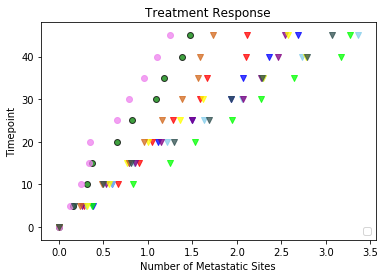

In [74]:
# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
plt.scatter(data0, y, marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.scatter(data1, y, marker="v", facecolors="blue", alpha=0.75)
plt.scatter(data2, y, marker="v", facecolors="red", alpha=0.75)
plt.scatter(data3, y, marker="v", facecolors="skyblue", alpha=0.75)
plt.scatter(data4, y, marker="v", facecolors="purple", alpha=0.75)
plt.scatter(data5, y, marker="v", facecolors="lime", alpha=0.75)
plt.scatter(data6, y, marker="v", facecolors="yellow", alpha=0.75)
plt.scatter(data7, y, marker="o", facecolors="violet", alpha=0.75)
plt.scatter(data8, y, marker="v", facecolors="chocolate", alpha=0.75)
plt.scatter(data9, y, marker="v", facecolors="darkslategrey", alpha=0.75)
plt.xlabel('Number of Metastatic Sites')
plt.ylabel('Timepoint')
plt.title('Treatment Response')
plt.legend(handles=[Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Placebo, Propriva, Ramicane, Stelasyn, Zoniferol], loc="lower right")
plt.show()

In [75]:
treatment_response_pd.head()


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [76]:
cell_one = treatment_response_pd.iloc[0, 0]

print(cell_one)

45.0


In [77]:
list_Capomulin_results = []
list_Ceftamin_results = []
list_Infubinol_results = []
list_Ketapril_results = []
list_Naftisol_results = []
list_Placebo_results = []
list_Propriva_results = []
list_Ramicane_results = []
list_Stelasyn_results = []
list_Zoniferol_results = []


In [78]:
for index, row in treatment_response_pd.iterrows():
    Capomulin_cell = row["Capomulin"]
    list_Capomulin_results.append(Capomulin_cell)
    
    Ceftamin_cell = row["Ceftamin"]
    list_Ceftamin_results.append(Ceftamin_cell)
    
    Infubinol_cell = row["Infubinol"]
    list_Infubinol_results.append(Infubinol_cell)
    
    Ketapril_cell = row["Ketapril"]
    list_Ketapril_results.append(Ketapril_cell)
    
    Naftisol_cell = row["Naftisol"]
    list_Naftisol_results.append(Naftisol_cell)
    
    Placebo_cell = row["Placebo"]
    list_Placebo_results.append(Placebo_cell)
    
    Propriva_cell = row["Propriva"]
    list_Propriva_results.append(Propriva_cell)
    
    Ramicane_cell = row["Ramicane"]
    list_Ramicane_results.append(Ramicane_cell)
    
    Stelasyn_cell = row["Stelasyn"]
    list_Stelasyn_results.append(Stelasyn_cell)
    
    Zoniferol_cell = row["Zoniferol"]
    list_Zoniferol_results.append(Zoniferol_cell)

In [79]:
print(list_Capomulin_results)

[45.0, 44.2660864152, 43.084290581999994, 42.064317346250014, 40.716325321739134, 39.93952782681817, 38.76933928863637, 37.816838882272734, 36.958000811428576, 36.236113800000005]


In [80]:
list_Capomulin_change = [0]
list_Ceftamin_change = [0]
list_Infubinol_change = [0]
list_Ketapril_change = [0]
list_Naftisol_change = [0]
list_Placebo_change = [0]
list_Propriva_change = [0]
list_Ramicane_change = [0]
list_Stelasyn_change = [0]
list_Zoniferol_change = [0]

nine_list = list(range(9))
print(nine_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [81]:
for i in nine_list:
    result = list_Capomulin_results[i+1] - list_Capomulin_results[i]
    list_Capomulin_change.append(result)
    
    result = list_Ceftamin_results[i+1] - list_Ceftamin_results[i]
    list_Ceftamin_change.append(result)
    
    result = list_Infubinol_results[i+1] - list_Infubinol_results[i]
    list_Infubinol_change.append(result)
    
    result = list_Ketapril_results[i+1] - list_Ketapril_results[i]
    list_Ketapril_change.append(result)
    
    result = list_Naftisol_results[i+1] - list_Naftisol_results[i]
    list_Naftisol_change.append(result)
    
    result = list_Placebo_results[i+1] - list_Placebo_results[i]
    list_Placebo_change.append(result)
    
    result = list_Propriva_results[i+1] - list_Propriva_results[i]
    list_Propriva_change.append(result)
    
    result = list_Ramicane_results[i+1] - list_Ramicane_results[i]
    list_Ramicane_change.append(result)
    
    result = list_Stelasyn_results[i+1] - list_Stelasyn_results[i]
    list_Stelasyn_change.append(result)
    
    result = list_Zoniferol_results[i+1] - list_Zoniferol_results[i]
    list_Zoniferol_change.append(result)

In [82]:
print(list_Capomulin_change)
print(list_Ceftamin_change)

[0, -0.7339135847999998, -1.181795833200006, -1.0199732357499798, -1.34799202451088, -0.7767974949209631, -1.1701885381818045, -0.9525004063636331, -0.8588380708441576, -0.7218870114285707]
[0, 1.5030509585714213, 1.782074257428576, 1.8089296776842119, 2.062993610760252, 2.130625553333317, 2.4818431522222184, 2.0580306164285673, 2.6403476207143086, 2.6645258890109673]


In [83]:
# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(-15, 20, .5)
y_axis = np.arange(-15, 20, .5)


# Create a random array of data that we will use for our y values
y = timepoint_bin
data0 = np.array(list_Capomulin_change)
data1 = np.array(list_Ceftamin_change)
data2 = np.array(list_Infubinol_change)
data3 = np.array(list_Ketapril_change)
data4 = np.array(list_Naftisol_change)
data5 = np.array(list_Placebo_change)
data6 = np.array(list_Propriva_change)
data7 = np.array(list_Ramicane_change)
data8 = np.array(list_Stelasyn_change)
data9 = np.array(list_Zoniferol_change)

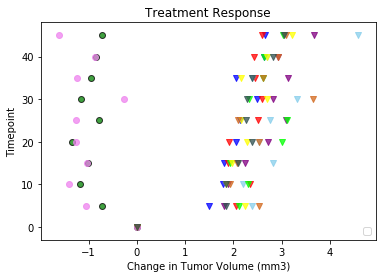

In [84]:
# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
Capomulin = plt.scatter(data0, y, marker="o", facecolors="green", edgecolors="black", alpha=0.75)
Ceftamin = plt.scatter(data1, y, marker="v", facecolors="blue", alpha=0.75)
Infubinol = plt.scatter(data2, y, marker="v", facecolors="red", alpha=0.75)
Ketapril = plt.scatter(data3, y, marker="v", facecolors="skyblue", alpha=0.75)
Naftisol = plt.scatter(data4, y, marker="v", facecolors="purple", alpha=0.75)
Placebo = plt.scatter(data5, y, marker="v", facecolors="lime", alpha=0.75)
Propriva = plt.scatter(data6, y, marker="v", facecolors="yellow", alpha=0.75)
Ramicane = plt.scatter(data7, y, marker="o", facecolors="violet", alpha=0.75)
Stelasyn = plt.scatter(data8, y, marker="v", facecolors="chocolate", alpha=0.75)
Zoniferol = plt.scatter(data9, y, marker="v", facecolors="darkslategrey", alpha=0.75)
plt.xlabel('Change in Tumor Volume (mm3)')
plt.ylabel('Timepoint')
plt.title('Treatment Response')
plt.legend(handles=[Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Placebo, Propriva, Ramicane, Stelasyn, Zoniferol], loc="lower right")
plt.show()

Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

UHHH OHHH NO data for (Survival Rate)

In [87]:
treatment_response_pd.head(10)

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [ ]:
row["Capomulin"]